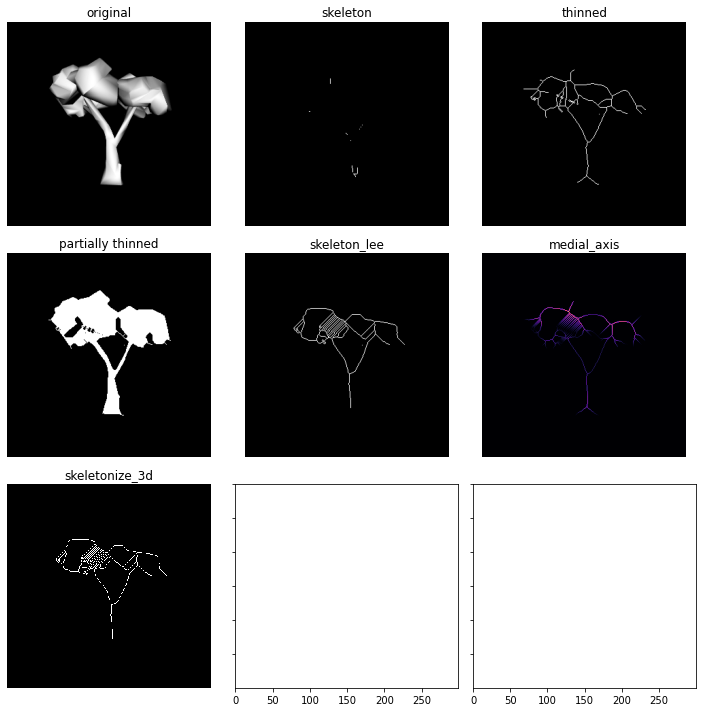

In [1]:
from skimage.morphology import medial_axis, skeletonize, thin, skeletonize_3d
from skimage import morphology, color
import cv2
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

img = cv2.imread(r"**\flower_pot__static\tree2\tree3.png")
image=color.rgb2gray(img)


def skeletonize_methods(image):
    skeleton = skeletonize(image)
    skeleton3d = skeletonize_3d(image)
    thinned = thin(image)
    thinned_partial = thin(image, max_iter=3)
    skeleton_lee = skeletonize(image, method='lee')
    skel, distance = medial_axis(image, return_distance=True)
    dist_on_skel = distance * skel
    return skeleton, thinned, thinned_partial, skeleton_lee, dist_on_skel, skeleton3d

def plot_skel(image):
    skeleton, thinned, thinned_partial, skeleton_lee, dist_on_skel, skeleton3d = skeletonize_methods(image)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    ax[1].imshow(skeleton, cmap=plt.cm.gray)
    ax[1].set_title('skeleton')
    ax[1].axis('off')

    ax[2].imshow(thinned, cmap=plt.cm.gray)
    #ax[2].contour(image, [0.5], colors='w')
    ax[2].set_title('thinned')
    ax[2].axis('off')

    ax[3].imshow(thinned_partial, cmap=plt.cm.gray)
    ax[3].set_title('partially thinned')
    ax[3].axis('off')

    ax[4].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[4].set_title('skeleton_lee')
    ax[4].axis('off')

    ax[5].imshow(dist_on_skel, cmap='magma')
    #ax[5].contour(image, [0.5], colors='w')
    ax[5].set_title('medial_axis')
    ax[5].axis('off')

    ax[6].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
    #ax[6].contour(image, [0.5], colors='w')
    ax[6].set_title('skeletonize_3d')
    ax[6].axis('off')

    fig.tight_layout()
    plt.show()

plot_skel(image)